In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
poke_df = pd.read_csv('Pokemon.csv')

In [47]:
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [48]:
poke_df.shape

(800, 13)

In [49]:
poke_df[['HP', 'Attack', 'Defense']].head()

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


In [50]:
poke_df['Defense'].describe()

count    800.000000
mean      73.842500
std       31.183501
min        5.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      230.000000
Name: Defense, dtype: float64

# Binarization

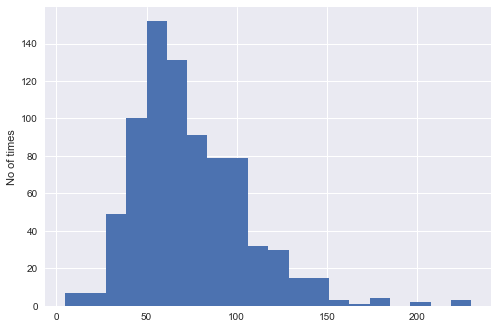

In [51]:
plt.hist(poke_df['Defense'], bins=20)
plt.ylabel('No of times')
plt.show()


In [18]:
Defense_Binarization=poke_df["Defense"]
Defense_Binarization[Defense_Binarization>100]=0

C:\Users\Shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
poke_df['Defense_Bin'] = poke_df['Defense'].apply(lambda x: '0' if x <= 73 else '1')


In [53]:
poke_df.groupby(['Defense_Bin']).count()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Defense_Bin,,,,,,,,,,,,,
0,448,448,448,195,448,448,448,448,448,448,448,448,448
1,352,352,352,219,352,352,352,352,352,352,352,352,352


# Quantization or Binning

In [55]:
poke_df['Defense_quant'] = np.array(np.floor( np.array(poke_df['Defense']) / 10.))

In [58]:
poke_df.head()
print(poke_df['Defense_quant'].max())

23.0


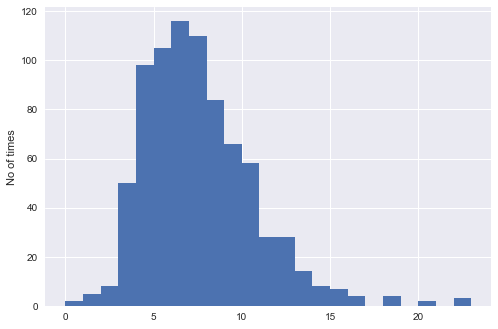

In [59]:
plt.hist(poke_df['Defense_quant'], bins=23)
plt.ylabel('No of times')
plt.show()